**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

**Kaggle Team Name:** \_\_\_\_\_

# CS5489 - Assignment 2 - Game Music Tagging
Due date: see Assignment 2 on Canvas

## Goal
In this assignment, we intend do classify the category of birds according to its one audio clip.


## Steps
### 1. Converting the raw audio format to Mel-spec. 

In [1]:
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)
import csv
from scipy import io
import pickle
from IPython.display import Audio, display
import os.path

In [2]:
def showAudio(info):
    myfile = 'musicmp3/' + info['fname'] + '.mp3'
    if os.path.exists(myfile):
        display(Audio(myfile))
    else:
        print("*** mp3 file " + myfile + " could not be found ***")

def load_pickle(fname):
    f = open(fname, 'rb')
    out = pickle.load(f)
    f.close()
    return out

# Load the Data
The training and test data are stored in various pickle files. Here we assume the data is stored in the `musicdata` directory. The below code will load the data, including tags and extracted features.

In [3]:
# train_tags  = load_pickle('musicdata/train_tags.pickle3')
# train_mfccs = load_pickle('musicdata/train_mfccs.pickle3')
# train_mels  = load_pickle('musicdata/train_mels.pickle3')
# train_info  = load_pickle('musicdata/train_info.pickle3') # useless

# test_mfccs = load_pickle('musicdata/test_mfccs.pickle3')
# test_mels  = load_pickle('musicdata/test_mels.pickle3')
# test_info  = load_pickle('musicdata/test_info.pickle3')

In [4]:
# 1. read the data
# data_file = load_pickle('/mnt/lyh/Code/temple.pickle3')
data_file = load_pickle('train_mel(dB,sr=32k,bin=128).pickle3')
mel = data_file['mel']
label = data_file['primary_label']
# convert each element in list to sub-list
label = [i.split(',') for i in label]

# 2. split the data into train and test
train_mels, test_mels, train_mel_tags, test_mel_tags = model_selection.train_test_split(mel, label, test_size=0.1, random_state=0)


In [188]:
import pandas as pd

def process_outlier(label, train_mels, test_mels, train_mel_tags, test_mel_tags):

    coun = pd.value_counts(label)

    count_lis = dict(zip(coun.index.values.tolist(),coun.values.tolist()))

    for key in count_lis:
        if key.split(',') not in train_mel_tags:
            print('yes-----------', key)
            index_outlier_in_test = test_mel_tags.index(key.split(','))
            print('before removing the outlier, the len of training and test data is: ', len(train_mel_tags),  len(test_mel_tags))
            value = test_mels.pop(index_outlier_in_test)
            class_name = test_mel_tags.pop(index_outlier_in_test)
            
            # append the value and class to train data
            train_mel_tags.append(class_name)
            train_mels.append(value)
            print('After removing the outlier, the len of training and test data is: ', len(train_mel_tags), len(test_mel_tags))

process_outlier(data_file['primary_label'], train_mels,test_mels, train_mel_tags, test_mel_tags)


In [189]:
# read mfccs
mfccs = load_pickle('mfccs(n=20).pickle3')

train_mfccs, test_mfccs, train_mfcc_tags, test_mfcc_tags = model_selection.train_test_split(mfccs, label, test_size=0.1, random_state=0)


process_outlier(data_file['primary_label'], train_mfccs, test_mfccs, train_mfcc_tags, test_mfcc_tags)

yes----------- afpkin1
before removing the outlier, the len of training and test data is:  15246 1695
After removing the outlier, the len of training and test data is:  15247 1694


Here are the things in the dataset:

- `train_info` - info about each sound in the training set.
- `train_mels` - the Mel-frequency spectrogram for each sound in the training set. Mel-frequency is a logarithmically-transformed frequency with better perceptual distance.  More details [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8).
- `train_mfccs` -  MFCCs (Mel-frequency cepstrum coefficients) are dimensionality-reduced version of the Mel-frequency spectrogram. Specifically, the log is applied to the magnitudes, and then a Discrete Cosine Transform is applied at each time. 
- `train_tags` - the descriptive tags for each sound in the training set.
- `test_info` - info about each sound in the test set.
- `test_mels` - the Mel Spectrogram for each sound in the test.
- `test_mfccs` - the MFCC features for each sound in the test.

Here is the one song in the training set, as well as the tags and other info. To play the audio, we assume the mp3s are available in the `musicmp3` directory.

In [8]:
# ii = 9
# print(len(train_mfcc_tags))
# # showAudio(train_info[ii])
# print(train_mfcc_tags[ii])
# print(train_info[ii])

# print(train_mfccs[ii].shape)

Here is the Mel-frequency spectrogram, which shows the frequency content over time. The spectrogram is stored in an `B x T` matrix, where `B` is the number of bins, and `T` is the temporal length.  The left plot shows the original Mel spectrogram (with time increasing to the right).  The right plot shows the log magnitude, which can better visualize the differences.  Here we use `B=128` Mel-bins.

(128, 1474)


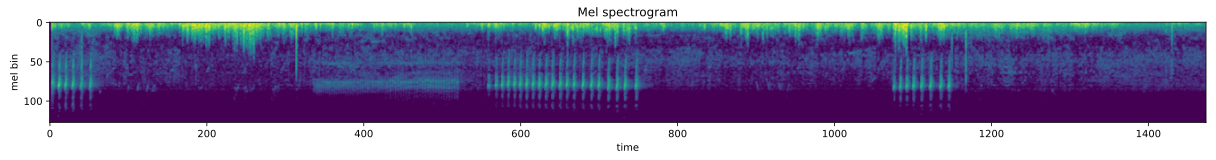

In [190]:
print(train_mels[ii].shape)

plt.figure(figsize=(17,8))
plt.imshow(train_mels[ii]);
plt.xlabel('time')
plt.ylabel('mel bin');
plt.title('Mel spectrogram')
plt.tight_layout()

MFCCs are a dimensionality-reduced version of the Mel-spectrogram.  To get the MFCC, the Discrete Cosine Transform (DCT) is applied to each 128-dim log-Mel bin vector.  Here we use 20-dimension DCT, so the 128-dim vector is convereted to 20-dim in each time step.  The left plot shows the MFCCs as an image, while the right plots the individual dimensions over time.

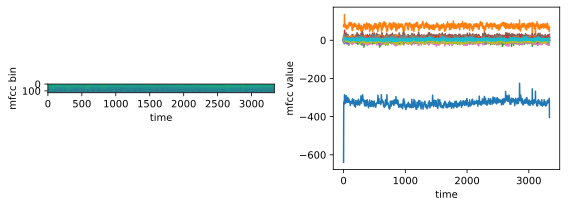

In [191]:

# test_mfccs = mel_2_mfcc(test_mels)
# train_mfccs = mel_2_mfcc(train_mels)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(test_mels[ii]);
plt.xlabel('time')
plt.ylabel('mfcc bin')
plt.subplot(1,2,2)
plt.plot(test_mfccs[ii])
plt.xlabel('time')
plt.ylabel('mfcc value')
plt.tight_layout()

## Data Pre-processing - Delta MFCCs

The first thing you might notice is that the MFCC vectors are time-series.  One trick to include time-series information into a vector representation is to append the difference between two consecutive feature vectors.  This way, we can include some relationship between two time steps in the representation.

In [192]:
# compute delta MFCCs
def compute_delta_mfccs(mfccs):
    dmfccs = []
    for m in mfccs:
        tmp = m[1:] - m[0:-1]
        dm = hstack((m[0:-1], tmp))
        dmfccs.append(dm)
    return dmfccs

In [193]:
train_dmfccs = compute_delta_mfccs(train_mfccs)
test_dmfccs  = compute_delta_mfccs(test_mfccs)

In [196]:
print(train_dmfccs[0][0])

[-618.14124      0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
   17.419312    12.489668     7.08157     16.644817    12.823392
    6.6086035    7.5529118    5.258937     1.2168245    2.4747682
    1.5041676   -5.7602987   -4.1869354   -2.1970406   -8.809923
   -6.489318    -4.144849    -8.54211     -6.354453    -3.8784966]


## Data Pre-processing - bag-of-words

The next problem you might notice is that the number of MFCCs is different for each sound, since sound can have different lengths.  Hence, before using our machine learning algorithms, we need to encode the MFCCs into a vector.

One solution is to use a "bag-of-audio-words" representation, which is analogous to the bag-of-words representation for text.
Here, we build a vocabulary of "audio-words" and map each MFCC to one of the words.  Then we can represent each sound as a histogram of counts.

We will use the k-means clustering algorithm to build the codebook of audio words.  .

In [197]:
# put dmfccs from all training data together
all_dmfccs = vstack(train_dmfccs)
print(all_dmfccs.shape)

(38641899, 40)


In [198]:
# run k-means to build codebook
km = cluster.KMeans(n_clusters=100, random_state=4487)
km.fit(all_dmfccs[0::100])  # subsample by 10 to make it faster
km.cluster_centers_

array([[-3.62069824e+02,  9.15154724e+01, -1.00542587e+02, ...,
         7.14417100e-02, -4.44564670e-02,  2.16426551e-02],
       [-4.66351624e+02,  6.04095650e+01, -5.89425049e+01, ...,
         3.74186896e-02,  2.82216985e-02, -6.79823980e-02],
       [-4.45403534e+02,  1.11666595e+02,  1.45769424e+01, ...,
        -5.84497675e-02, -5.41715920e-02,  1.57887861e-02],
       ...,
       [-5.12156860e+02,  8.91380768e+01,  6.46434784e-01, ...,
         6.60562664e-02,  7.12476447e-02,  6.87910393e-02],
       [-3.59177124e+02, -1.13548012e+01, -4.10936852e+01, ...,
        -3.02696466e-01, -1.39477775e-01, -1.41902924e-01],
       [-5.02828522e+02,  8.84177780e+01,  2.22233238e+01, ...,
         1.40893376e-02,  7.04243407e-02, -1.09906793e-02]], dtype=float32)

Now transform the data into BOW.

In [199]:
def bow_transform(model, mfccs):
    numwords = model.cluster_centers_.shape[0]
    bows = zeros((len(mfccs), numwords))
    for i in range(len(mfccs)):
        w = model.predict(mfccs[i])
        bw = bincount(w, minlength=numwords)
        bows[i,:] = bw
    return bows

In [200]:
train_bow = bow_transform(km, train_dmfccs)
test_bow  = bow_transform(km, test_dmfccs)

# Tag pre-processing

Next, we extract all the tags from the data, and get a unique list of tags.

In [202]:

class_names = load_pickle('bird_names.pickle3')
class_names = [i.split(',') for i in class_names]

tagnames, tagnames_counts = unique(concatenate(class_names), return_counts=True)
for a,b in zip(tagnames, tagnames_counts):
    print("{}: {}".format(a, b))

264
abethr1: 1
abhori1: 1
abythr1: 1
afbfly1: 1
afdfly1: 1
afecuc1: 1
affeag1: 1
afgfly1: 1
afghor1: 1
afmdov1: 1
afpfly1: 1
afpkin1: 1
afpwag1: 1
afrgos1: 1
afrgrp1: 1
afrjac1: 1
afrthr1: 1
amesun2: 1
augbuz1: 1
bagwea1: 1
barswa: 1
bawhor2: 1
bawman1: 1
bcbeat1: 1
beasun2: 1
bkctch1: 1
bkfruw1: 1
blacra1: 1
blacuc1: 1
blakit1: 1
blaplo1: 1
blbpuf2: 1
blcapa2: 1
blfbus1: 1
blhgon1: 1
blhher1: 1
blksaw1: 1
blnmou1: 1
blnwea1: 1
bltapa1: 1
bltbar1: 1
bltori1: 1
blwlap1: 1
brcale1: 1
brcsta1: 1
brctch1: 1
brcwea1: 1
brican1: 1
brobab1: 1
broman1: 1
brosun1: 1
brrwhe3: 1
brtcha1: 1
brubru1: 1
brwwar1: 1
bswdov1: 1
btweye2: 1
bubwar2: 1
butapa1: 1
cabgre1: 1
carcha1: 1
carwoo1: 1
categr: 1
ccbeat1: 1
chespa1: 1
chewea1: 1
chibat1: 1
chtapa3: 1
chucis1: 1
cibwar1: 1
cohmar1: 1
colsun2: 1
combul2: 1
combuz1: 1
comsan: 1
crefra2: 1
crheag1: 1
crohor1: 1
darbar1: 1
darter3: 1
didcuc1: 1
dotbar1: 1
dutdov1: 1
easmog1: 1
eaywag1: 1
edcsun3: 1
egygoo: 1
equaka1: 1
eswdov1: 1
eubeat1: 1
fatrav1: 1

Now we convert the list of tags for each sound into binary attributes.

In [203]:
# convert list of tags into binary class labels
def tags2class(tags, tagnames):
    b = zeros(shape=(len(tags), len(tagnames)))
    for i,t in enumerate(tags):
        for j,n in enumerate(tagnames):
            if n in t:
                b[i,j] = 1
    return b

In [310]:
# train_classes[i,j] = absence/presence of the j-th tag in the i-th sound
train_classes = tags2class(train_mfcc_tags, tagnames)

# for test data, as there are some items doesnot appear in test set
test_tagnames, _ = unique(concatenate(test_mfcc_tags), return_counts=True)
test_classes = tags2class(test_mfcc_tags, test_tagnames)
print(train_classes.shape, test_classes.shape)

(15247, 264) (1694, 222)


In [205]:
# double check we did this correctly...
# it should be the same as the tag counts above
sum(train_classes,axis=0)

array([ 13., 114.,  23.,  17.,  25.,  78.,  44.,   8.,  63.,  34.,  88.,
         1.,  67.,  53.,  24.,  26.,  38.,  38.,  12.,  21., 450.,  43.,
         7.,  74.,  29.,  99.,  28.,  56.,  70., 224.,  46., 150.,  20.,
        35.,  23.,  15.,  13.,  22.,  15.,   8.,   7.,  20.,  11.,   9.,
         2.,  59.,   2.,  25.,  21.,  36.,  27.,   7.,   1.,  76.,  34.,
        26.,  64.,   9.,  26.,  33., 132.,  41., 157.,  11.,   6.,   8.,
        68.,  25.,  26.,  98., 387., 166., 267., 423., 451.,   1.,  33.,
        44.,  28.,   6.,  73.,   3.,   7.,  15., 452.,  18., 135.,   6.,
        58., 396.,  23.,   4.,  14., 124.,  27., 128.,  42., 216.,  17.,
        72.,   3.,   3.,   2.,  86.,  11., 126., 228.,  90.,  22.,  23.,
        18.,   8.,  48.,  63.,  46.,  22.,  42.,   9., 117.,  29.,  17.,
        50.,   6., 386.,  11.,   5.,   7.,  32.,  52.,   9., 100.,  53.,
        13.,  37.,  25., 339.,  57.,  16.,  14.,   1.,   3.,  17.,  13.,
         6.,  12.,   5.,  36.,   8.,  29.,  34.,  2

In [311]:
# test_classes = zeros(shape=(len(test_mfcc_tags), len(tagnames)))
# for i,t in enumerate(test_mfcc_tags):
#     for j,n in enumerate(tagnames):
#         if n in t:
#             test_classes[i,j] = 1
            
print(test_classes[1])#.sum()
for i in range(test_classes.shape[0]):
    if test_classes[i].sum() != 1:
        print(test_classes[i].sum())


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Baseline experiments

Next, we will run a baseline experiment doing semantic tagging with bag-of-audio words.

Apply TF-IDF to the count vectors.

In [206]:
# convert to TF
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(train_bow)
test_Xtf  = tf_trans.transform(test_bow)

Now learn a logisic regression classifier for each tag.

In [208]:
import warnings
warnings.filterwarnings('ignore')

tagmodels = {}

for i,t in enumerate(tagnames):
    print('training {} - {}'.format(i, t))
    myY = train_classes[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', n_jobs=8)

    lr.fit(train_Xtf, myY)

    tagmodels[t] = lr

training 0 - abethr1
(15247, 100) (15247,)
training 1 - abhori1
(15247, 100) (15247,)
training 2 - abythr1
(15247, 100) (15247,)
training 3 - afbfly1
(15247, 100) (15247,)
training 4 - afdfly1
(15247, 100) (15247,)
training 5 - afecuc1
(15247, 100) (15247,)
training 6 - affeag1
(15247, 100) (15247,)
training 7 - afgfly1
(15247, 100) (15247,)
training 8 - afghor1
(15247, 100) (15247,)
training 9 - afmdov1
(15247, 100) (15247,)
training 10 - afpfly1
(15247, 100) (15247,)
training 11 - afpkin1
(15247, 100) (15247,)
training 12 - afpwag1
(15247, 100) (15247,)
training 13 - afrgos1
(15247, 100) (15247,)
training 14 - afrgrp1
(15247, 100) (15247,)
training 15 - afrjac1
(15247, 100) (15247,)
training 16 - afrthr1
(15247, 100) (15247,)
training 17 - amesun2
(15247, 100) (15247,)
training 18 - augbuz1
(15247, 100) (15247,)
training 19 - bagwea1
(15247, 100) (15247,)
training 20 - barswa
(15247, 100) (15247,)
training 21 - bawhor2
(15247, 100) (15247,)
training 22 - bawman1
(15247, 100) (15247,)

To see how we did on tagging the training set, we compute the tag scores.

In [210]:
train_predscore = zeros(shape=(len(train_mfccs), len(tagnames)))

for i,t in enumerate(tagnames):
    tmp = tagmodels[t].decision_function(train_Xtf)
    train_predscore[:,i] = tmp

And then plot the ROC curve using the training classes and training predicted scores.

In [211]:
# plot an ROC curve using class labels and class scores
import numpy as np

def plot_roc(tagnames, Yclasses, Yscores):
    fprall = []
    tprall = []
    aucall = []
    for i in range(len(tagnames)):
        fpr, tpr, thresholds = metrics.roc_curve(Yclasses[:,i], Yscores[:,i])

        plt.plot(fpr, tpr, lw=0.5, alpha=0.5)
        auc = metrics.auc(fpr, tpr)

        tprall.append(tpr)        
        fprall.append(fpr)
        aucall.append(auc)

    # Then interpolate all ROC curves at this points
    all_fpr = unique(concatenate(fprall))
    mean_tpr = zeros_like(all_fpr)
    
    for i in range(len(tagnames)):
        mean_tpr += interp(all_fpr, fprall[i], tprall[i])

    # Finally average it and compute AUC
    mean_tpr /= len(tagnames)

    # auc of the average ROC curve
    auc = metrics.auc(all_fpr, mean_tpr)

    # average AUC
    mc_auc = mean(aucall)

    plt.plot(all_fpr, mean_tpr, 'k-', lw=2)
    plt.title('MCAUC={:.4f}, AUC={:.4f}'.format(mc_auc, auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    plt.grid(True)

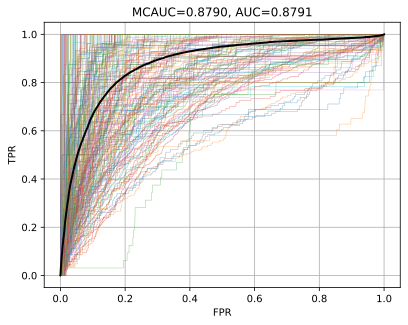

In [212]:
plot_roc(tagnames, train_classes, train_predscore)

Note that AUC is the AUC of the black curve, while MCAUC is the average of the AUCs for all the color curves.

Now apply the LR classifiers to the test set to predict the score for each tag.

In [214]:
test_predscore = zeros(shape=(len(test_mfccs), len(tagnames)))

for i,t in enumerate(tagnames):
    # print('predicting {} - {}'.format(i, t))
    # try:
    tmp = tagmodels[t].decision_function(test_Xtf)
    # except:
    #     print('ignoring the outlier')
    test_predscore[:,i] = tmp

We have the scores, now lets look at the predicted tags.

In [215]:
# convert binary class vector into a list of tags
def class2tags(classes, tagnames):
    tags = []
    for n in range(classes.shape[0]):
        tmp = []
        for i in range(classes.shape[1]):
            if classes[n,i]:
                tmp.append(tagnames[i])
        tags.append(" ".join(tmp))
    return tags

We need to convert the score into a binary class label using a threshold (usually 0).

In [216]:
# convert score into binary class 0 or 1.  
test_predclass = test_predscore>0

# convert to tags
test_predtags = class2tags(test_predclass, tagnames)

Now write the tag scores for the test set for submission to Kaggle. We need to upload the tag scores so that Kaggle can generate the ROC curves and calculate AUC.

In [217]:
import csv

def write_csv_kaggle_tags(fname, tagnames, Yscores):
    # header
    tmp = [['Id']]
    for t in tagnames:
        tmp[0].append(t)    
    
    # add ID numbers for each Y, and usage if necessary
    for i in range(len(Yscores)):
        tmp2 = [(i+1)]
        for t in range(len(tagnames)):
            tmp2.append(Yscores[i,t])
        
        tmp.append(tmp2)
        
    # write CSV file
    f = open(fname, 'w')
    writer = csv.writer(f)
    writer.writerows(tmp)
    f.close()

In [127]:
# print(test_predscore.shape)
# write_csv_kaggle_tags("music_bow_baseline.csv", tagnames, test_predscore)

## YOUR CODE and DOCUMENTATION HERE

In [218]:
# import librosa
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

### Different Feature Representations

### Different Dimensionality Reduction Methods

In [312]:
# trainX, testX, trainY, testY = train_test_split(train_bow, train_classes, test_size=0.2)
trainX, trainY = train_bow, train_classes
testX, testY = test_bow, test_classes

# convert to TF
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
train_Xtf = tf_trans.fit_transform(trainX)
test_Xtf  = tf_trans.transform(testX)

print(train_Xtf.shape, test_Xtf.shape)


(15247, 100) (1694, 100)


In [317]:
def evaluate_tagmodels(tagmodels, train_x=train_Xtf, test_x=test_Xtf):
    # evaluate on the train set
    train_predscore = zeros(shape=trainY.shape)
    for i,t in enumerate(tagnames):
        # print('predicting {} - {}'.format(i, t))
        tmp = tagmodels[t].decision_function(train_x)
        train_predscore[:,i] = tmp
    
    # test set
    test_predscore = zeros(shape=testY.shape)
    for i,t in enumerate(test_tagnames):
        # print('predicting {} - {}'.format(i, t))
        tmp = tagmodels[t].decision_function(test_x)
        test_predscore[:,i] = tmp

    ROC_train = metrics.roc_auc_score(trainY, train_predscore, average=None).mean()
    ROC_test = metrics.roc_auc_score(testY, test_predscore, average=None).mean()
    print(f'train: {ROC_train}, test: {ROC_test}')

In [234]:
import warnings
warnings.filterwarnings('ignore')

print('----- Logistic Regression ------')
tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', n_jobs=8)
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

----- Logistic Regression ------


In [318]:
# evaluation for logistic regression
evaluate_tagmodels(tagmodels, train_Xtf, test_Xtf)

train: 0.8732047359361007, test: 0.6728618761655202


In [319]:
print('\n----- Logistic Regression with PCA ------')

pca = decomposition.PCA(n_components=20) 
WtrainX  = pca.fit_transform(trainX)  
WtestX = pca.transform(testX)  
print(WtrainX.shape, WtestX.shape)

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX, myY)
    tagmodels[t] = lr



----- Logistic Regression with PCA ------
(15247, 20) (1694, 20)


In [320]:
# evaluation for logistic regression (with PCA)
evaluate_tagmodels(tagmodels, WtrainX, WtestX)

train: 0.7748994351684629, test: 0.6164707763387232


In [334]:
print('\n------- Linear Dimensionality Reduction - NMF ----------')

nmf = decomposition.NMF(n_components=20)
WtrainX_nmf  = nmf.fit_transform(trainX)  
WtestX_nmf = nmf.transform(testX)  

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX_nmf, myY)
    tagmodels[t] = lr



------- Linear Dimensionality Reduction - NMF ----------


In [335]:
# evaluation (Linear Dimensionality Reduction - NMF)
evaluate_tagmodels(tagmodels, WtrainX_nmf, WtestX_nmf)

train: 0.7346541773780412, test: 0.6037909478003342


In [ ]:
print('------- Non-Linear Dimensionality Reduction - KPCA ----------')

kpca = decomposition.KernelPCA(n_components=20, kernel='rbf', gamma=0.001, n_jobs=-1)
WtrainX_kpca  = kpca.fit_transform(trainX)  
WtestX_kpca = kpca.transform(testX)  

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,10), cv=5, class_weight='balanced', solver='saga', max_iter=2000, n_jobs=8)
    lr.fit(WtrainX_kpca, myY)
    tagmodels[t] = lr

# test_predscore = zeros(shape=testY.shape)
# for i,t in enumerate(tagnames):
#     # print('predicting {} - {}'.format(i, t))
#     tmp = tagmodels[t].decision_function(WtestX_kpca)
#     test_predscore[:,i] = tmp
# ROC_test = metrics.roc_auc_score(testY, test_predscore, average=None).mean()
# print(f'test: {ROC_test}')

In [ ]:
# evaluation (KPCA)
evaluate_tagmodels(tagmodels, WtrainX_kpca, WtestX_kpca)

### Different Image Classifiers

In [322]:
print('----- Linear SVM ------')
tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = svm.SVC(kernel='linear')
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

----- Linear SVM ------


In [323]:
evaluate_tagmodels(tagmodels)

train: 0.6808352055045505, test: 0.559541271357044


In [325]:
print('----- SVM with RBF kernel ------')
tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    lr = svm.SVC(kernel='rbf')
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr


----- SVM with RBF kernel ------


In [326]:

evaluate_tagmodels(tagmodels)

train: 0.997357534333311, test: 0.6697646425633439


In [327]:
print('----- SVM with RBF kernel (Grid Search) ------')
C_tmp = logspace(-2, 3, 10)

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    model_svm = svm.SVC(kernel='rbf')
    lr = model_selection.GridSearchCV(estimator=model_svm, param_grid={'C': C_tmp}, cv=5, n_jobs=8)
    lr.fit(train_Xtf, myY)
    # print(lr.best_params_)
    tagmodels[t] = lr


----- SVM with RBF kernel (Grid Search) ------


In [328]:
evaluate_tagmodels(tagmodels)

train: 0.9364414316361498, test: 0.6346671103504874


In [329]:
print('-----  AdaBoost (Grid Search) ------')
parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 1, 10]}

tagmodels = {}
for i,t in enumerate(tagnames):
    # print('training {} - {}'.format(i, t))
    myY = trainY[:,i].ravel()
    adaclf = ensemble.AdaBoostClassifier(random_state=4487)
    lr = model_selection.GridSearchCV(adaclf, parameters, cv=5, n_jobs=8)
    lr.fit(train_Xtf, myY)
    tagmodels[t] = lr

-----  AdaBoost (Grid Search) ------


In [330]:
evaluate_tagmodels(tagmodels)

train: 0.9512929185226543, test: 0.6965824637347384


In [332]:
print('-----  XGBClassifier ------')
!pip install xgboost
import xgboost as xgb  

parameters = {
    'max_depth': [3, 5, 7, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2, 1, 10],
    'n_estimators': [50, 100, 150, 200, 300]
}

xgbclf = xgb.XGBClassifier()
xgbclf = model_selection.GridSearchCV(xgbclf, parameters, cv=5, n_jobs=8)
xgbclf.fit(train_Xtf, myY)

# y_pred_xgbclf = xgbclf.predict_proba(testX)
# ROC_test = metrics.roc_auc_score(testY, y_pred_xgbclf, average=None).mean()
# print(ROC_test)

-----  XGBClassifier ------
     |████████████████████████████████| 200.3 MB 101.4 MB/s eta 0:00:01   | 127.6 MB 73.5 MB/s eta 0:00:01:00:015 MB/s eta 0:00:01�███████████████▌ | 191.0 MB 101.4 MB/s eta 0:00:01


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=8,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 1, 10],
                         'max_depth': [3, 5, 7, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [333]:
evaluate_tagmodels(tagmodels)

train: 0.9512929185226543, test: 0.6965824637347384


### CNN Classifier

Bag-of-audio-words (BoAW) is a representation that is commonly used for audio classification, but it may not be suitable for use with a CNN-based classifier. BoAW representations are typically sparse and high-dimensional, which can make it difficult to train a CNN model on them.

Instead, for a CNN-based classifier, it is more common to use a spectrogram representation of the audio data. The spectrogram represents the frequency content of the audio signal over time, and can be thought of as a two-dimensional image. This representation can be easily fed into a CNN model, which can learn to extract features that are useful for classification.

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 24
seed_everything(SEED)

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, mels, labels=None, transform=None, size=None):
        self.mels = mels
        self.labels = labels
        self.transform = transform
        self.size = size 
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        mel = self.mels[idx]
        # mel = log(np.abs(mel) + 1e-10)      ####### Note!

        image = Image.fromarray(mel, mode='RGB')    
        image = self.transform(image)
        # image  = image.div_(255)
        
        mean = image.mean()
        std = image.std()
        image = (image - mean) / std 

        if self.size is not None:
            image = torch.nn.functional.interpolate(image.unsqueeze(0), self.size).squeeze(0)
        
        if self.labels is not None:
            label = self.labels[idx]
            label = torch.from_numpy(label).float()
            
            return image, label
        
        return image 



In [ ]:

class AudioCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioCNN, self).__init__()
                
        backbone = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
        feats = list(backbone.children())
        self.feats = feats[0]

        lastconv_output_channels = 1280 
        ## mlp 
        self.classifier = nn.Sequential(
                nn.AdaptiveAvgPool2d(1),
                nn.Flatten(start_dim=1),
                nn.Linear(lastconv_output_channels, lastconv_output_channels//2),
                nn.Hardswish(inplace=True),
                nn.Linear(lastconv_output_channels//2, num_classes),
            )
        # self.classifier = nn.Sequential(
        #         nn.Conv2d(
        #             lastconv_output_channels,
        #             num_classes,
        #             kernel_size=(1, 1),
        #             stride=(1, 1),
        #             padding=(0, 0),
        #             bias=False),
        #         nn.BatchNorm2d(num_classes),
        #         nn.AdaptiveAvgPool2d((1, 1)),
        #     )

    def forward(self, x):
        out = self.feats(x)
        out = self.classifier(out)
        return out.squeeze() 

In [ ]:
test_dataset = AudioDataset(test_dmfccs, labels=None, transform=transforms_test, size=(1024, 512))
# test_dataset = AudioDataset(test_mels, labels=None, transform=transforms_test, size=(1024, 512))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model_trained = AudioCNN(num_classes=num_classes).to(device)
model_trained.load_state_dict(torch.load(f'weight_best_roc_(log_0.7468).pt'))
model_trained.eval()

valid_preds = np.zeros((len(test_dataset), num_classes))

with torch.no_grad():
    for i, (inputs) in enumerate(test_loader):
        inputs = inputs.to(device)
        outputs = model_trained(inputs)
        # outputs = torch.sigmoid(outputs)
        valid_preds[i * batch_size: (i+1) * batch_size] = outputs.cpu().numpy()

write_csv_kaggle_tags("music_bow_baseline_(log_0.7468).csv", tagnames, valid_preds)

Try different hyperparameters:

- different image size
    -  (1024, 512): 0.7118
    -  (1024, 40): 0.6993
- no random flip: 0.7247

Try different feature representations:

- spectrogram -> 0.7247
- log(spectrogram) -> 0.7360

Applying a log transformation can enhance the dynamic range of the input features, imroving the model's performance.